---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Linear Regression

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## These data points will be used in the exercises:

x =  [[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
y =  [[3.76405235]
 [3.20015721]
 [4.57873798]
 [6.6408932 ]
 [7.06755799]
 [5.02272212]
 [7.75008842]
 [7.44864279]
 [8.29678115]
 [9.6105985 ]]


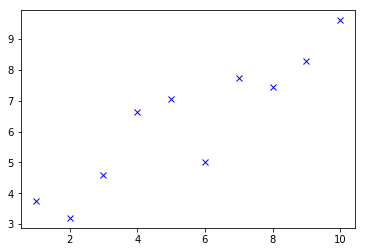

In [2]:
m = 10 # training examples
x = linspace(1, 10, m).reshape(m, 1)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ]).reshape(m, 1)

print('x = ', x)
print('y = ', y)

plot(x, y, 'bx')

### Let's prepare the data points for matrix manipulation:

In [3]:
X = insert(x, 0, ones(len(x)), axis=1)
Y = array(y).reshape(m, 1) #questo è uguale a y

print ('X = \n', X)
print ('Y = \n', Y)

X = 
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
Y = 
 [[3.76405235]
 [3.20015721]
 [4.57873798]
 [6.6408932 ]
 [7.06755799]
 [5.02272212]
 [7.75008842]
 [7.44864279]
 [8.29678115]
 [9.6105985 ]]


# Exercises

## Exercise 1: Ordinary Least Squares

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement Linear Regression and use the Ordinary Least Squares (OLS) closed-form expression to find the estimated values of $\mathbf{w}$:

$$\mathbf{w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$$

w = 
 [[2.87377128]
 [0.62986398]]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


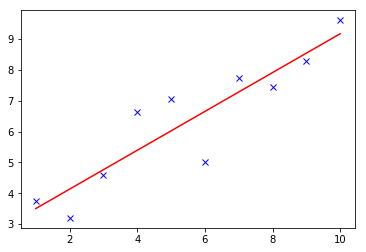

In [4]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # computing X pseudoinverse

print('w = \n', w)

print(X[:,1])

p = plot (X[:,1], Y, 'bx') #X[:,1] --> vett. riga con numeri da 1 a 10
p = plot (X[:,1], X.dot(w), 'r-')  #funzione lineare che ho trovato col modello: g(X)=XW

## Exercise 2: Batch Gradient Descent

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement the Batch Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.  
At each training step, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha \left(\left(\mathbf{X}\mathbf{w} - \mathbf{y}\right)^T\mathbf{X}_i\right)$$

[[2.54603924]
 [0.67684198]]


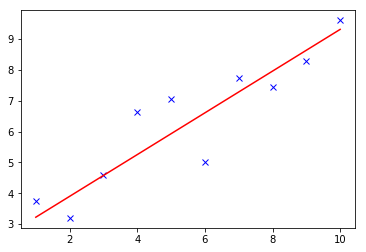

In [6]:
#nel nostro caso abbiamo una funz. convessa (tipo parabola)  dobbiamo
#trovare il minimo. Calcoliamo il gradiente (direzione di salita della curva)
# e andiamo in direzione opposta.
#una volta che ci siamo spostati ricalcoliamo il gradiente e capiamo dove 
#spostarci di nuovo.

#alpha ci dice quanto spostarci ogni volta. attenzione:
    # -alpha piccolo: ci muoviamo troppo lenti: in N passi magari non arriviamo al minimo
    # -alpha grande: saltiamo da un lato all'altro della parabola senza scendere mai al minimo

n, d = X.shape
s = 1000 # learning steps
alpha = 0.001 # learning rate --> quanto ci muoviamo nella discesa del 
              # gradiente

w = zeros(d).reshape(d, 1)

for step in range(s):
    for i in range(d): #ciclo sulle colonne
        grad = (X.dot(w) - y).T.dot(X[:,i])  #--> sto calcolando il gradiente per tutti i punti del dataset
        w[i] = w[i] - alpha*grad
    #w = w - alpha*(X.dot(w) - y).T.dot(X).T
        #il gradiente è un vett. colonna, devo farne il trasposto

print(w)    #trovo una W molto simile a prima

p = plot (X[:,1], Y, 'bx')
p = plot (X[:,1], X.dot(w), 'r-')

## Exercise 3: Stochastic Gradient Descent

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement the Stochastic Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.
In each step, iterate through all $j$ samples and, for each sample, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha\left(\mathbf{X}^{(j)}\mathbf{w} - \mathbf{y}^{(j)}\right)\mathbf{X}^{(j)}_i$$

[[2.53360194]
 [0.67762415]]


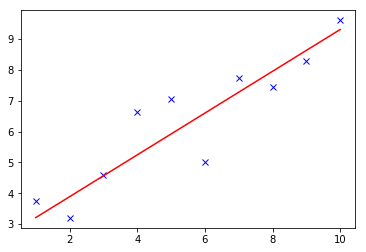

In [7]:
#andremo a calcolare il gradiente punto per punto (quando il dataset è
# troppo grosso per farlo tutto insieme)
#il punto del dataset sarà il punto j

n, d = X.shape
s = 1000 # learning steps
alpha = 0.001 # learning rate

w = zeros(d).reshape(d, 1)

for step in range(s): 
    for j in range(n): #ciclo sule righe
        for i in range(d): #ciclo sulle colonne
            w[i] = w[i] - alpha*(X[j].dot(w) - y[j]).dot(X[j,i])
            
    #si può togliere un ciclo e fare operazioni vettoriali, però bisogna
    #mettere dei reshape per mantenere le dimensioni corrette

print(w)

p = plot (X[:,1], Y, 'bx')
p = plot (X[:,1], X.dot(w), 'r-')

## Exercise 4: write a function fit(X,Y) 

The function fit(X,Y) receives a matrix $X \in \mathbb{R}^{m,n}$, where m is the number of samples and n is the number of features, and a matrix $Y \in \mathbb{R}^{m}$, and returns the matrix of coefficients $\mathbf{w} \in \mathbb{R}^{n+1}$.   
Implement the function with Ordinary Least Squares

In [8]:
def my_fit(X, Y):
    
#prova a casa a implementare il fit con OLS
    # YOUR CODE HERE
    nx, mx = X.shape   # nx = num. righe di X,   mx = num. colonne di X
    ny, my = Y.shape
    if nx != ny or my != 1:
        raise Exception('X e Y non sono compatibili !!!')
    
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return(w)
    

w =  [[2.87377128]
 [0.62986398]]


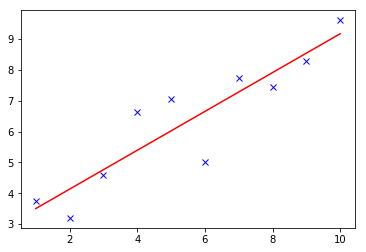

In [9]:
# let's test it!

m = 10
x = linspace(1, m, m).reshape(m,1)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ]).reshape(m,1)

#sistemo la x:
x = insert(x, 0, ones(len(x)), axis=1) # X deve essere una matrice con  
                                       # la prima colonna di tutti 1.
                                       # deve avere almeno due colonne
w = my_fit(x,y)

print('w = ', w)

p = plot (x[:,1], y, 'bx')
p = plot (x[:,1], x.dot(w), 'r-')


# Using Scikit-Learn for Linear Regression

Check if Scikit-Learn is installed in your system. If not, install it.

Resources and documentation: http://scikit-learn.org/

In [10]:
import sklearn

## Exercise 5: find the coefficients $\mathbf{w}$ using sklearn.linear_model.LinearRegression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [12]:
from sklearn.linear_model import LinearRegression

Coefficients 2 =  [0.62986398] , Intercept =  2.8737712786666667


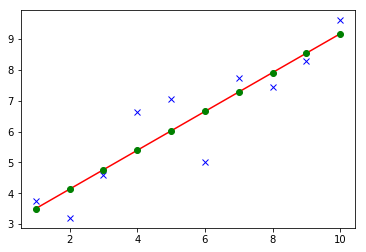

In [15]:
#implemento il modello usando la regressione lineare di sklearn

m = 10
x = linspace(1, m, m)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ])
x.shape = (m,1)

# YOUR CODE HERE
model = LinearRegression(fit_intercept=True)
model.fit(x,y) #questa è una funzione da applicare ad un oggetto della 
               # classe LinearRegression

print('Coefficients 2 = ', model.coef_, ', Intercept = ', model.intercept_)
# compare the results to the Ordinary Least Squares result!
    # --> ottengo gli stessi parametri ottenuti con l'algoritmo OLS, 
    #sono invece un po' diversi dai coefficienti ottenuti con gli altri 
    #algoritmi

p = plot (x, y, 'bx')
p = plot (x, x*model.coef_+model.intercept_, 'r-')
p = plot (x, model.predict(x), 'go')

## Exercise 6: find the coefficients $\mathbf{w}$ using sklearn.linear_model.Lasso

Regularization introduces a penalty in the model complexity, in order to prevent overfitting.  
Lasso (least absolute shrinkage and selection operator) uses the constraint that $\|\mathbf{w}\|_1$, the L1-norm of the parameter vector, is no greater than a given value.  
The optimization objective for Lasso is:
$$ \frac{1}{2n} \|\mathbf{Xw} - \mathbf{y}\|^2_2 + \alpha\|\mathbf{w}\|_1$$

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [16]:
from sklearn.linear_model import Lasso

# la norma L1 di w è la somma dei valori assoluti delle componenti di w
# (la norma L2 è la norma solita: sqrt( somma x_i^2 )   )

Coefficients =  [0.50865186] , Intercept =  3.540437945333334


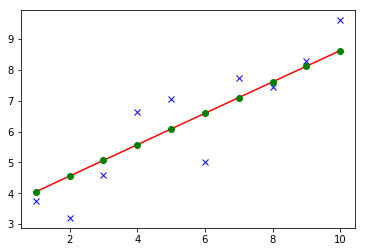

In [17]:
m = 10
x = linspace(1, m, m)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ])
x.shape = (m,1)

# YOUR CODE HERE
model = Lasso(alpha=1.0) # è il moltiplicatore di Lagrange
model.fit(x,y)
#

#alfa è il parametro che controlla la regolarizzazione. Se alfa = 0,allora
#torniamo alla regressione lineare.
#tra i parametri di Lasso() possiamo settare alfa a zero, troviamo coeff. 
#simili a quelli ottenuti con la regolarizzazione lineare semplice


print('Coefficients = ', model.coef_, ', Intercept = ', model.intercept_)
# compare the results to the Ordinary Least Squares result!

p = plot (x, y, 'bx')
p = plot (x, x*model.coef_+model.intercept_, 'r-')
p = plot (x, model.predict(x), 'go')

# Working with the Boston house-prices dataset

Let's load the dataset and print the description

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

X = boston.data
y = boston.target

#506 punti con 13 attributi ognuno. c'è la descrizione dei parametri
#alla fine assegnamo alla variabile x i dati e alla y i risultati

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
#vediamo cosa sono x e y:
print X.shape
print y.shape

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(X.shape)? (<ipython-input-19-5446e400bb91>, line 2)

In [20]:
y

#abbiamo un problema di regressione.

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Now, create a plot for each feature, to have an idea of their correlation with the target variable

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 	 --> lunghezza =  13


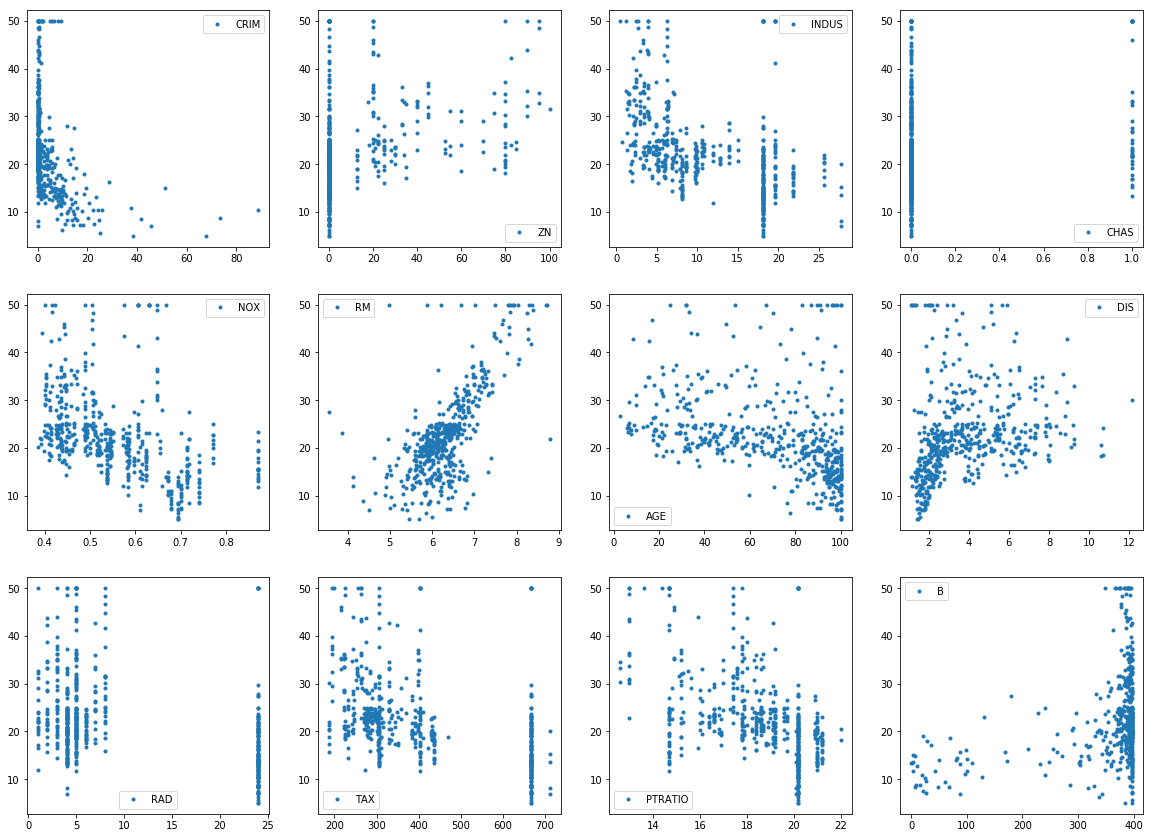

In [21]:
figure(figsize=(20,20))
nr_plots = len(boston.feature_names)-1

print(boston.feature_names, '\t --> lunghezza = ', len(boston.feature_names))

# YOUR CODE HERE
#soluzione su dropbox
#figure(figsize=(20,20))
#nr_plots = len(boston.feature_names)-1
for i in range(nr_plots):
    ax = subplot(4,4,i+1)
    ax.plot(X[:,i], y, '.', label=boston.feature_names[i])
    legend()

# ho 506 punti, con 13 caratteristiche e un target:
#in ogni subplot sto raffigurando i 506 punti, sulle ascisse ho la caratteristica
# i-esima e sulle ordinate ho la y
# Quindi questi punti vivono in uno spazio 13 dimensionale, io sto raffigurando
# i diversi sottospazi che uniti mi danno l'intero spazio (non so 
# perchè ne plotto solo 12, non raffiguro la tredicesima dimensione...)

## Exercise 7: Create a Regression model using Scikit-Learn Linear Regression for the Boston house-prices dataset

Use sklearn.linear_model.LinearRegression to predict the target variable y using only the average number of rooms (RM)

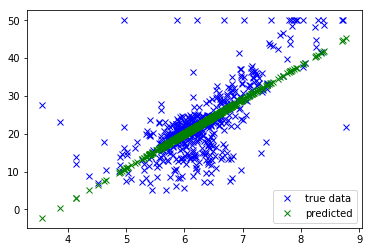

In [22]:
from sklearn.linear_model import LinearRegression

Xtrain = X[:,[5]]

# YOUR CODE HERE

# Tra l'altro dando un'occhiata veloce RM è l'unico a cui sembra possibile applicare una regressione lineare


#come potrebbe funzionare una regressione lineare che guardi solo al numero
#di camere dei nostri immobili? (caratteristica num. 5 dei nostri vettori)
#infatti scelgo come Xtrain = X[:,[5]]

model = LinearRegression(fit_intercept=True)
model.fit(Xtrain,y)

pred=model.predict(Xtrain)

plot(Xtrain, y, 'bx', label='true data')
plot(Xtrain, pred, 'gx', label='predicted')
legend()

# Working with Train and Test sets

Let's split our dataset in the Training and Test sets

In [25]:
nr_cases = y.shape[0] #506 punti
nTrain = np.floor(nr_cases *2.0 / 3.0) # num di training set sono i 2/3 di 
                                       # 506. --> 337
import random
ids = arange(nr_cases) #creo una lista di indici che vanno da 1 a 506
random.shuffle(ids) #rimescolo la lista

trainX,trainY,testX,testY = [],[],[],[]
for i, idx in enumerate(ids):
    if i < nTrain:
        trainX.append(X[idx, [5]])
        trainY.append(y[idx])
    else:
        testX.append(X[idx, [5]])
        testY.append(y[idx])
    if i == 10 or i == 20:
        print('1) i = ', i, ' -->   ', X[idx, [5]])
        print('2) i = ', i, ' -->  ', y[idx])

# mi sono creato un training set di 337 punti, e un test set di 169 punti
# i punti sono rimescolati
                            
print(len(ids))
print(len(trainX), len(trainY))
print(len(testX), len(testY))
print(len(trainX)+len(testX))

1) i =  10  -->    [6.121]
2) i =  10  -->   22.2
1) i =  20  -->    [6.635]
2) i =  20  -->   24.5
506
337 337
169 169
506


## Exercise 8: Calculate the MAE and RMSE

Use only the samples in the training set to train your regression model (use sklearn.linear_model.LinearRegression).

Predict the values for the samples in the test set and calculate the **mean absolute error (MAE)** and the **root-mean-square error (RMSE)**.

In [27]:
def mae(testY, predY):
    # YOUR CODE HERE
    return np.mean(np.abs(testY - predY))

def rmse(testY, predY):
    # YOUR CODE HERE
    return np.sqrt(np.mean((testY - predY)**2))
    #possiamo fare la radice anche così: (x)**(0.5)
    
    
# Train a Linear Regression model using only train data
# YOUR CODE HERE
model = LinearRegression(fit_intercept=True)
model.fit(trainX, trainY)


# Predict the test values using the model
predY = model.predict(testX)

print(len(trainX[10]))
print(mae(testY, predY))  #mean absolute error
print(rmse(testY, predY)) #root mean squared error

1
4.252472245938045
5.988510585856876


## Exercise 9: Train with all features

Split the Boston house-prices dataset into Training and Test sets, but using all features. Train a regression model with all features, calculate the MAE and RMSE and compare it with the previous results.

In [29]:
#vediamo come il modello migliora utilizzando tutte le caratteristiche
# di ogni punto, non solo la quinta feature, che era il numero di camere
# il training set avrà ancora 337 punti (cioè 337 righe), ma userà 13 
# features invece che una (cioè ha 13 colonne)

nr_cases = y.shape[0]
nTrain = np.floor(nr_cases *2.0 / 3.0)
import random
ids = arange(nr_cases)
random.shuffle(ids)

trainX,trainY,testX,testY = [],[],[],[]
for i, idx in enumerate(ids):
    if i < nTrain:
        trainX.append(X[idx])
        trainY.append(y[idx])
    else:
        testX.append(X[idx])
        testY.append(y[idx])

In [30]:
def mae(testY, predY):
    # YOUR CODE HERE
    return np.mean(np.abs(testY - predY))

def rmse(testY, predY):
    # YOUR CODE HERE
    return np.sqrt(np.mean((testY - predY)**2))


# Train a Linear Regression model using only train data
# YOUR CODE HERE
model = LinearRegression(fit_intercept=True)
model.fit(trainX, trainY)

# Predict the test values using the model
predY = model.predict(testX)

print(len(trainX[10]))
print(mae(testY, predY))  #mean absolute error
print(rmse(testY, predY))

#i risultati migliorano un pochino ma non molto

13
3.373929431885231
5.168384281852086


In [32]:
#utilizziamo una regolarizzazione Lasso e valutiamo i risultati del modello

def mae(testY, predY):
    # YOUR CODE HERE
    return np.mean(np.abs(testY - predY))

def rmse(testY, predY):
    # YOUR CODE HERE
    return np.sqrt(np.mean((testY - predY)**2))


# Train a Linear Regression model using only train data
# YOUR CODE HERE
model = Lasso(alpha=1)
model.fit(trainX, trainY)

# Predict the test values using the model
predY = model.predict(testX)


print(mae(testY, predY))  #mean absolute error
print(rmse(testY, predY))
#può succedere che il MAE peggiori e l'RMSE migliori. Dipende dal problema
#normalmente si usa o la linearMeanSquareError, o la RootMeanSquareError

#si può migliorare il modello provando i diversi alfa
#si può vedere come si comporta il modello al variare di alfa e trovare 
#il valore ottimale di alfa

3.598953986286748
5.195101245359842
